<a href="https://colab.research.google.com/github/Abhay182005dat/ML_Lab/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

In [18]:
x_train.shape

(12665, 28, 28)

In [19]:
x_test.shape

(2115, 28, 28)

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9984 - loss: 0.0031 - val_accuracy: 0.9996 - val_loss: 6.4691e-04
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.9996 - val_loss: 5.1141e-04
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9997 - loss: 7.7530e-04 - val_accuracy: 1.0000 - val_loss: 6.7337e-04
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9995 - loss: 0.0012 - val_accuracy: 0.9988 - val_loss: 0.0056
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9984 - loss: 0.0039 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9999 - loss: 3.5158e-04 - val_accuracy: 1.0000 - val_loss: 5.0805e-05
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.5298e-04
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.99

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.0526e-04
Test Accuracy: 99.95%


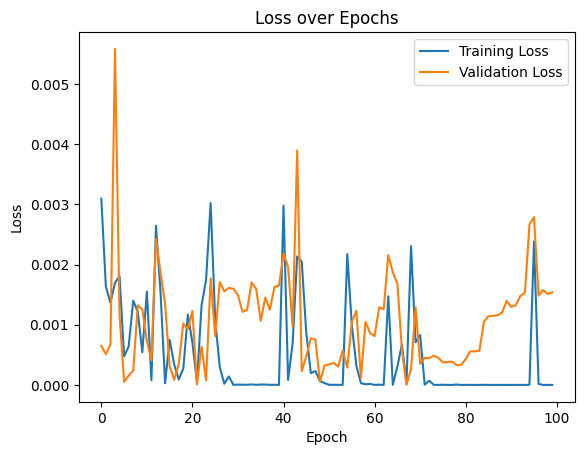

In [24]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

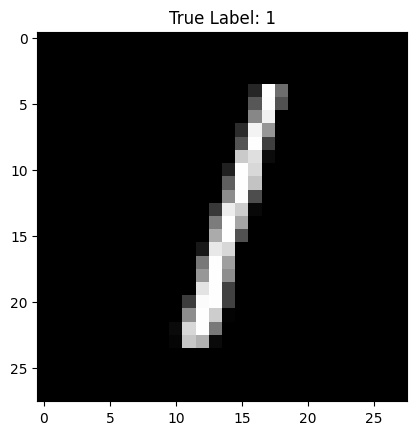

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted probability of 1: 1.0
Predicted label: 1


In [25]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Label: {y_test[0]}")
plt.show()

pred = model.predict(np.expand_dims(x_test[0], axis=0))
print("Predicted probability of 1:", pred[0][0])
print("Predicted label:", int(pred[0][0] > 0.5))